<a href="https://colab.research.google.com/github/Meera-Ajay-25/NLP-projects/blob/main/E_commerce_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project: **Reccomendation prediction of e-coomerce clothing using NLP**

Algorithm Used: K Nearest Neighbors, Support Vector Machine,Decision tree,Random Forest, ANN

steps:
1) Importing the necessary libraries.

2) Data Preprocessing.

3) Removing Special Characters.

4) Word Cloud creation.

5) Tokenization and Stemming.

6) Removing stop words.

7) Vectorization.

8) Model building and Evaluation.

9) Using ANN model.

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("/content/E commerce site.csv")
df

,ID,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


In [59]:
#importing nltk packages
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [60]:
#checking the data types
df.dtypes

ID                          int64
Clothing ID                 int64
Age                         int64
Title                      object
Review Text                object
Rating                      int64
Recommended IND             int64
Positive Feedback Count     int64
Division Name              object
Department Name            object
Class Name                 object
dtype: object

In [61]:
#dropping id and clothing ID
df.drop(['ID','Clothing ID'],axis=1,inplace=True)
df

,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...
23481,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


In [62]:
df.isna().sum()

Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [63]:
# Replace NaN values with empty strings (if any)
df['Review Text'].fillna('', inplace=True)

In [64]:
df

,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...
23481,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


## **Exploratory Data Analysis**

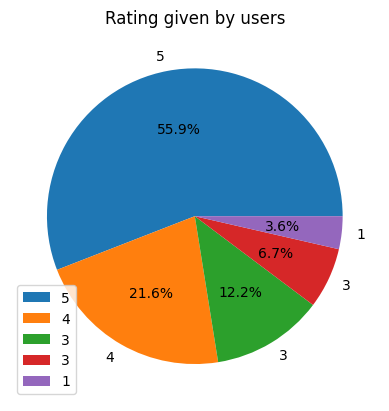

In [ ]:
#Checking the rating of users
y=df['Rating'].value_counts()
labels=['5','4','3','3','1']
plt.pie(y,labels=labels,autopct='%1.1f%%')
plt.legend(loc='lower left')
plt.title('Rating given by users')
plt.show()

<Axes: xlabel='Recommended IND', ylabel='count'>

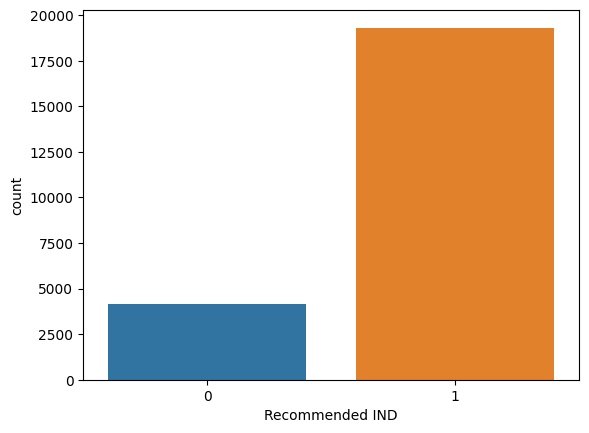

In [ ]:
sns.countplot(x='Recommended IND',data=df)

<Axes: xlabel='Recommended IND', ylabel='count'>

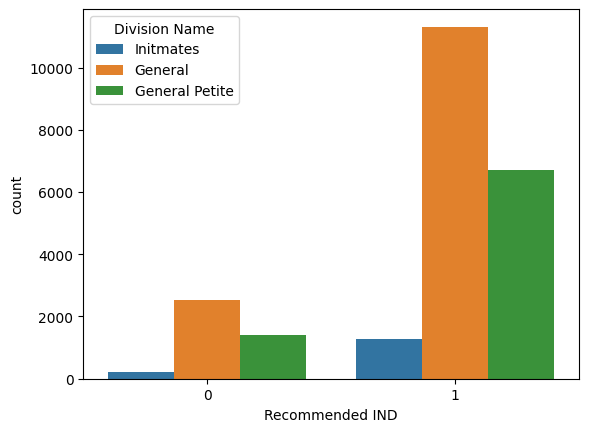

In [ ]:
sns.countplot(x='Recommended IND',data=df,hue='Division Name')

<Axes: xlabel='Class Name', ylabel='count'>

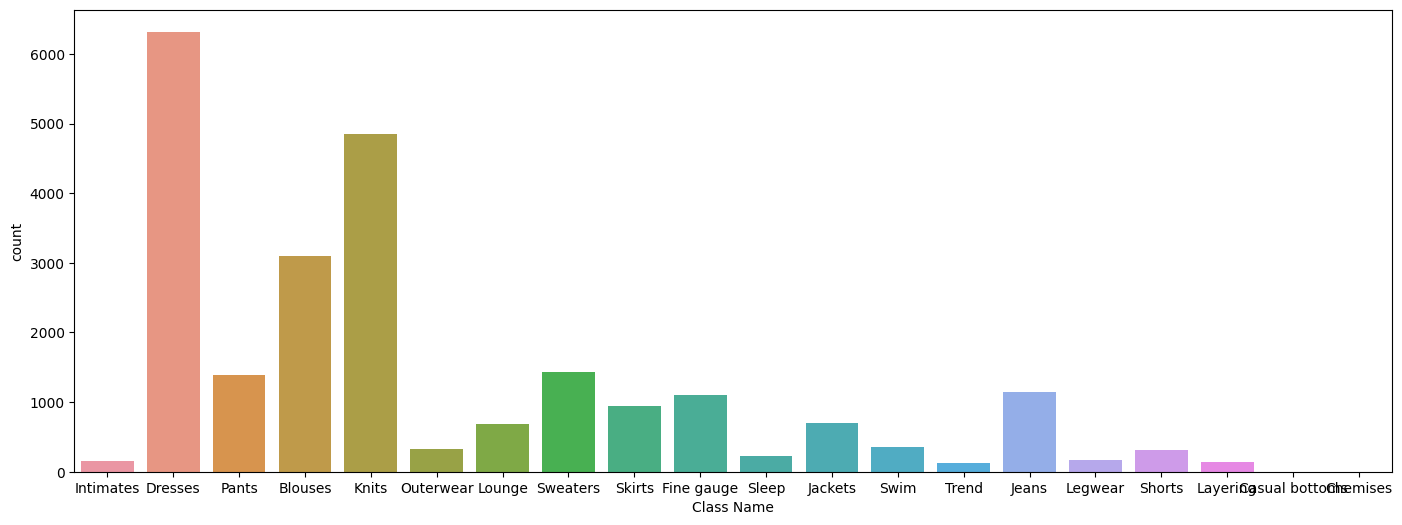

In [ ]:
#checking class names where the highest sales happened
fig, ax = plt.subplots(1,1, figsize = (17,6))
sns.countplot(x='Class Name',data=df,ax=ax)

<Axes: xlabel='Division Name', ylabel='count'>

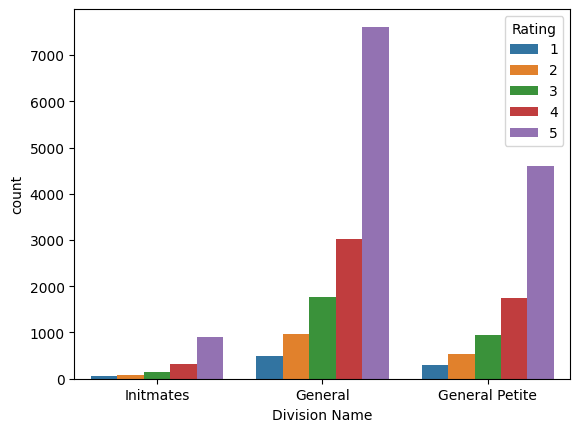

In [ ]:
#checking the division where highest sales happened
sns.countplot(x='Division Name',data=df,hue='Rating')

<ipython-input-13-aa299cfaa941>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


<Axes: xlabel='Age', ylabel='Density'>

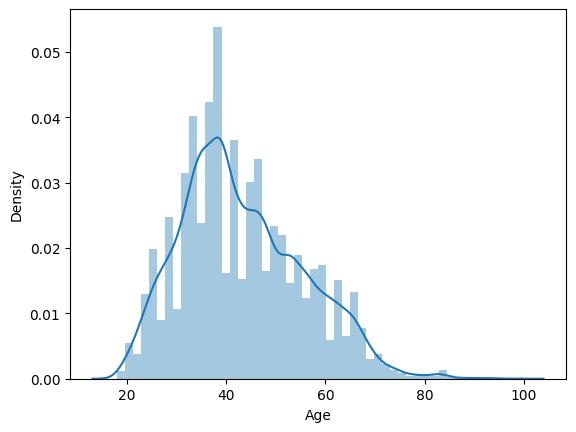

In [ ]:
#checking the age distribution
sns.distplot(df['Age'])

**NLP**

In [65]:
#considering columns Review Text and Recommended IND
df.drop(['Age','Title','Rating','Positive Feedback Count','Division Name','Department Name','Class Name'],axis=1,inplace=True)
df

,Review Text,Recommended IND
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1
...,...,...
23481,I was very happy to snag this dress at such a ...,1
23482,"It reminds me of maternity clothes. soft, stre...",1
23483,"This fit well, but the top was very see throug...",0
23484,I bought this dress for a wedding i have this ...,1


In [66]:
df.isna().sum()

Review Text        0
Recommended IND    0
dtype: int64

In [67]:
df['Recommended IND'].unique()

array([1, 0])

In [68]:
df = df.rename(columns={'Review Text': 'review_text'})
df

,review_text,Recommended IND
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1
...,...,...
23481,I was very happy to snag this dress at such a ...,1
23482,"It reminds me of maternity clothes. soft, stre...",1
23483,"This fit well, but the top was very see throug...",0
23484,I bought this dress for a wedding i have this ...,1


In [69]:
rev=df.review_text
rev

0        Absolutely wonderful - silky and sexy and comf...
1        Love this dress!  it's sooo pretty.  i happene...
2        I had such high hopes for this dress and reall...
3        I love, love, love this jumpsuit. it's fun, fl...
4        This shirt is very flattering to all due to th...
                               ...                        
23481    I was very happy to snag this dress at such a ...
23482    It reminds me of maternity clothes. soft, stre...
23483    This fit well, but the top was very see throug...
23484    I bought this dress for a wedding i have this ...
23485    This dress in a lovely platinum is feminine an...
Name: review_text, Length: 23486, dtype: object

**REMOVING SPECIAL CHARACTERS**

In [70]:
rev=rev.str.replace('[^a-zA-Z0-9]+'," ")
rev

<ipython-input-70-218c1edb1502>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  rev=rev.str.replace('[^a-zA-Z0-9]+'," ")


0        Absolutely wonderful silky and sexy and comfor...
1        Love this dress it s sooo pretty i happened to...
2        I had such high hopes for this dress and reall...
3        I love love love this jumpsuit it s fun flirty...
4        This shirt is very flattering to all due to th...
                               ...                        
23481    I was very happy to snag this dress at such a ...
23482    It reminds me of maternity clothes soft stretc...
23483    This fit well but the top was very see through...
23484    I bought this dress for a wedding i have this ...
23485    This dress in a lovely platinum is feminine an...
Name: review_text, Length: 23486, dtype: object

In [91]:
positive=df.loc[df['Recommended IND']==1][['review_text','Recommended IND']]
positive

,review_text,Recommended IND
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1
6,I aded this in my basket at hte last mintue to...,1
...,...,...
23480,,1
23481,I was very happy to snag this dress at such a ...,1
23482,"It reminds me of maternity clothes. soft, stre...",1
23484,I bought this dress for a wedding i have this ...,1


In [92]:
text_corpus = ' '.join(positive['review_text'].values)

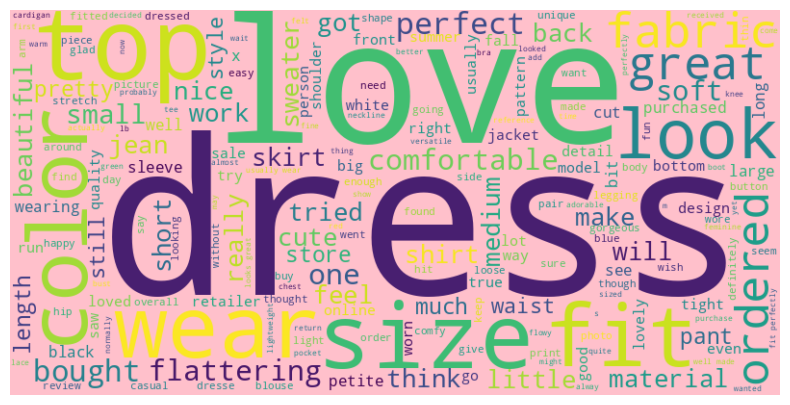

In [93]:
# Create a WordCloud for positive comments
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='pink').generate(text_corpus)
# Display the generated word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [94]:
negative=df.loc[df['Recommended IND']==0][['review_text','Recommended IND']]
negative

,review_text,Recommended IND
2,I had such high hopes for this dress and reall...,0
5,"I love tracy reese dresses, but this one is no...",0
10,Dress runs small esp where the zipper area run...,0
22,"First of all, this is not pullover styling. th...",0
25,"Loved the material, but i didnt really look at...",0
...,...,...
23449,I tried these on because the color is really p...,0
23450,I wanted to love this jacket. so soft and grea...,0
23460,I purchased this for a very good price and i t...,0
23478,I was surprised at the positive reviews for th...,0


In [95]:
text_corpus1 = ' '.join(negative['review_text'].values)

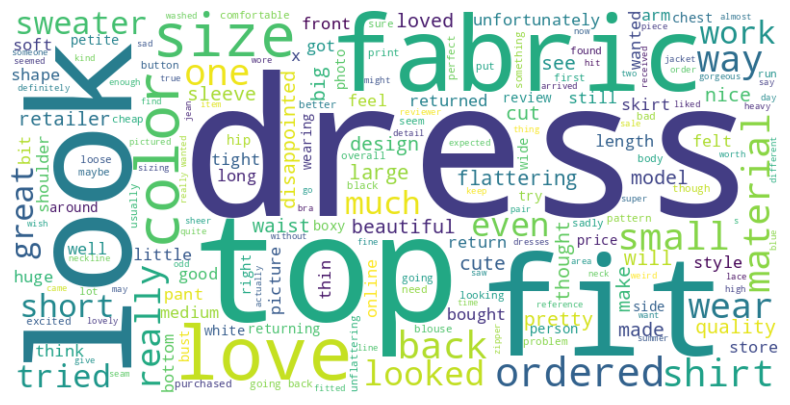

In [97]:
# Create a WordCloud for negative comments
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_corpus1)
# Display the generated word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**STEMMING**

In [71]:
#from nltk.stem import PorterStemmer
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize

In [72]:
ps=SnowballStemmer('english')
rev=rev.apply(lambda x:[ps.stem(i.lower()) for i in word_tokenize(str(x))]).apply(lambda y:" ".join(y))
rev

0                absolut wonder silki and sexi and comfort
1        love this dress it s sooo pretti i happen to f...
2        i had such high hope for this dress and realli...
3        i love love love this jumpsuit it s fun flirti...
4        this shirt is veri flatter to all due to the a...
                               ...                        
23481    i was veri happi to snag this dress at such a ...
23482    it remind me of matern cloth soft stretchi shi...
23483    this fit well but the top was veri see through...
23484    i bought this dress for a wed i have this summ...
23485    this dress in a love platinum is feminin and f...
Name: review_text, Length: 23486, dtype: object

**Remove stop words**

In [73]:
from nltk.corpus import stopwords
st=stopwords.words('english')
rev=rev.apply(lambda x:[i for i in word_tokenize(x) if i.lower() not in st]).apply(lambda y: " ".join(y))
rev

0                        absolut wonder silki sexi comfort
1        love dress sooo pretti happen find store glad ...
2        high hope dress realli want work initi order p...
3        love love love jumpsuit fun flirti fabul everi...
4        shirt veri flatter due adjust front tie perfec...
                               ...                        
23481    veri happi snag dress great price veri easi sl...
23482    remind matern cloth soft stretchi shini materi...
23483    fit well top veri see never would work glad ab...
23484    bought dress wed summer cute unfortun fit perf...
23485    dress love platinum feminin fit perfect easi w...
Name: review_text, Length: 23486, dtype: object

In [74]:
rev=rev.apply(lambda x:[i for i in word_tokenize(x) if len(i)>2]).apply(lambda y:" ".join(y))
rev

0                        absolut wonder silki sexi comfort
1        love dress sooo pretti happen find store glad ...
2        high hope dress realli want work initi order p...
3        love love love jumpsuit fun flirti fabul everi...
4        shirt veri flatter due adjust front tie perfec...
                               ...                        
23481    veri happi snag dress great price veri easi sl...
23482    remind matern cloth soft stretchi shini materi...
23483    fit well top veri see never would work glad ab...
23484    bought dress wed summer cute unfortun fit perf...
23485    dress love platinum feminin fit perfect easi w...
Name: review_text, Length: 23486, dtype: object

**TFIDF vectorisation**

In [76]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf1=TfidfVectorizer()
data_vec=tf1.fit_transform(rev)
print(data_vec)

  (0, 1969)	0.27100901896547047
  (0, 7187)	0.5122967332721367
  (0, 7347)	0.5610312889395596
  (0, 9201)	0.4424295383635088
  (0, 458)	0.39192622409369277
  (1, 8513)	0.2500262660352149
  (1, 7579)	0.2142564310432683
  (1, 5197)	0.2896409713049301
  (1, 8511)	0.1538691791176287
  (1, 2432)	0.16269587395649873
  (1, 4566)	0.19301238150098768
  (1, 4824)	0.12495885342674004
  (1, 4000)	0.18118255808100045
  (1, 4725)	0.1379031529170932
  (1, 1321)	0.13368059443422248
  (1, 6074)	0.4415358985589049
  (1, 5723)	0.15854639986871205
  (1, 5766)	0.11445729488942402
  (1, 9245)	0.22606786902795023
  (1, 5521)	0.21237893569550806
  (1, 3645)	0.19608519915976916
  (1, 7819)	0.1476150155029463
  (1, 3250)	0.174204095476065
  (1, 3866)	0.2536696035064246
  (1, 6345)	0.14504140883500044
  :	:
  (23484, 1481)	0.14876054508467446
  (23484, 1144)	0.12821313827558337
  (23484, 4775)	0.08194282468218611
  (23484, 4863)	0.07735966397254607
  (23484, 4853)	0.1188821707242642
  (23484, 6041)	0.18617618844

In [77]:
data_vec.shape

(23486, 9373)

In [78]:
y=df['Recommended IND'].values
y

array([1, 1, 0, ..., 0, 1, 1])

In [79]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data_vec,y,test_size=0.2,random_state=1)

In [82]:
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
sv=SVC()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
ad=AdaBoostClassifier()
models=[sv,dt,rf,ad]
for model in models:
  print(model)
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  print(classification_report(y_test,y_pred))

SVC()
              precision    recall  f1-score   support

           0       0.78      0.51      0.62       846
           1       0.90      0.97      0.93      3852

    accuracy                           0.89      4698
   macro avg       0.84      0.74      0.78      4698
weighted avg       0.88      0.89      0.88      4698

DecisionTreeClassifier()
              precision    recall  f1-score   support

           0       0.46      0.44      0.45       846
           1       0.88      0.88      0.88      3852

    accuracy                           0.80      4698
   macro avg       0.67      0.66      0.66      4698
weighted avg       0.80      0.80      0.80      4698

RandomForestClassifier()
              precision    recall  f1-score   support

           0       0.88      0.20      0.33       846
           1       0.85      0.99      0.92      3852

    accuracy                           0.85      4698
   macro avg       0.87      0.60      0.62      4698
weighted avg      

In [86]:
y_new=model.predict(tf1.transform(["I absolutely love shopping at this clothing store! The wide range of stylish and trendy outfits they offer is impressive."]))
if y_new==1:
    print("Will recommend")
if y_new==0:
    print("Will not recommend")

Will recommend


Here We got an accuracy of 89 for SVM.

### **Using ANN model**

In [39]:
# Extract text and labels from DataFrame
texts=df['review_text'].tolist()
labels= df['Recommended IND'].tolist()

In [43]:
# Tokenize the text
# Tokenize the text
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
word_index = tokenizer.word_index
vocab_size = len(word_index)

# Convert text to sequences
sequences = tokenizer.texts_to_sequences(texts)

# Pad sequences to make them the same length
max_sequence_length = max([len(seq) for seq in sequences])
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length)

In [46]:
# Convert labels to one-hot encoded vectors
import numpy as np
import tensorflow as tf
labels = np.array(labels)
num_classes = len(np.unique(labels))
one_hot_labels = tf.keras.utils.to_categorical(labels, num_classes=num_classes)

In [47]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, one_hot_labels, test_size=0.2, random_state=42)

In [53]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=vocab_size + 1, output_dim=128, input_length=max_sequence_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [54]:
epochs = 15
batch_size = 32

model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.1)

Epoch 1/15
529/529 [==============================] - 35s 63ms/step - loss: 0.3088 - accuracy: 0.8686 - val_loss: 0.2460 - val_accuracy: 0.8930
Epoch 2/15
529/529 [==============================] - 6s 12ms/step - loss: 0.1204 - accuracy: 0.9558 - val_loss: 0.3132 - val_accuracy: 0.8829
Epoch 3/15
529/529 [==============================] - 4s 8ms/step - loss: 0.0284 - accuracy: 0.9921 - val_loss: 0.5234 - val_accuracy: 0.8781
Epoch 4/15
529/529 [==============================] - 4s 8ms/step - loss: 0.0156 - accuracy: 0.9963 - val_loss: 0.6469 - val_accuracy: 0.8739
Epoch 5/15
529/529 [==============================] - 4s 8ms/step - loss: 0.0119 - accuracy: 0.9972 - val_loss: 0.7122 - val_accuracy: 0.8707
Epoch 6/15
529/529 [==============================] - 4s 7ms/step - loss: 0.0110 - accuracy: 0.9972 - val_loss: 0.7553 - val_accuracy: 0.8670
Epoch 7/15
529/529 [==============================] - 3s 7ms/step - loss: 0.0104 - accuracy: 0.9972 - val_loss: 0.8641 - val_accuracy: 0.8680
Epo

In [55]:
loss, accuracy = model.evaluate(X_test, y_test, batch_size=batch_size)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

147/147 [==============================] - 0s 3ms/step - loss: 0.8881 - accuracy: 0.8697
Test Loss: 0.8881, Test Accuracy: 0.8697
